In [2]:
import pandas as pd
import ast
import json
pd.set_option('display.max_rows', None)

# EDA

In [3]:
def read_parquet_from_gcs(file_names, gcs_prefix, key_path):
    dfs = {}
    for name in file_names:
        path = f"{gcs_prefix}/{name}.parquet"
        dfs[name] = pd.read_parquet(path, storage_options={"token": key_path})
    return dfs


file_list = [
    "accounts_attendance",
    "accounts_blockrecord",
    "accounts_failpaymenthistory",
    "accounts_friendrequest",
    "accounts_group",
    "accounts_nearbyschool",
    "accounts_paymenthistory",
    "accounts_user_contacts",
    "accounts_pointhistory",
    "accounts_school",
    "accounts_timelinereport",
    "accounts_user",
    "accounts_userquestionrecord",
    "accounts_userwithdraw",
    "event_receipts",
    "events",
    "polls_question",
    "polls_questionpiece",
    "polls_questionreport",
    "polls_questionset",
    "polls_usercandidate"
]

gcs_prefix = "gs://codeit-project/votes"
key_path = "./config/key.json"

dfs = read_parquet_from_gcs(file_list, gcs_prefix, key_path)

# 출석 테이블
accounts_attendance = dfs["accounts_attendance"]

# 차단 기록 테이블
accounts_blockrecord = dfs["accounts_blockrecord"]

# 상품 구매 실패 기록 테이블
accounts_failpaymenthistory = dfs["accounts_failpaymenthistory"]

# 친구 요청 테이블
accounts_friendrequest = dfs["accounts_friendrequest"]

# 그룹 테이블
accounts_group = dfs["accounts_group"]

# 근처 학교 테이블
accounts_nearbyschool = dfs["accounts_nearbyschool"]

# 결제 기록 테이블
accounts_paymenthistory = dfs["accounts_paymenthistory"]

# 사용자 연락처 테이블
accounts_user_contacts = dfs["accounts_user_contacts"]

# 포인트 내역 테이블
accounts_pointhistory = dfs["accounts_pointhistory"]

# 학교 정보 테이블
accounts_school = dfs["accounts_school"]

# 타임라인 신고 기록 테이블
accounts_timelinereport = dfs["accounts_timelinereport"]

# 사용자 기본 정보 테이블
accounts_user = dfs["accounts_user"]

# 사용자 질문 응답 기록 테이블
accounts_userquestionrecord = dfs["accounts_userquestionrecord"]

# 회원 탈퇴 기록 테이블
accounts_userwithdraw = dfs["accounts_userwithdraw"]

# 이벤트 영수증 테이블
event_receipts = dfs["event_receipts"]

# 이벤트 테이블
events = dfs["events"]

# 질문 테이블
polls_question = dfs["polls_question"]

# 질문 조각 테이블
polls_questionpiece = dfs["polls_questionpiece"]

# 질문 신고 테이블
polls_questionreport = dfs["polls_questionreport"]

# 질문 세트 테이블
polls_questionset = dfs["polls_questionset"]

# 사용자 후보 응답 테이블
polls_usercandidate = dfs["polls_usercandidate"]

In [5]:
print('✅유저 id unique:',accounts_user['id'].nunique())
print('✅유저 id min:',accounts_user['id'].min())
print('✅유저 id max:',accounts_user['id'].max())

# 분석할 통계 함수 정의
stats = {
    "unique": "nunique",
    "min": "min",
    "max": "max"
}

# 반복문으로 user_id 통계 출력
for table_name in file_list:
    df = dfs[table_name]
    
    # user_id 컬럼이 없으면 건너뜀
    if "user_id" not in df.columns:
        print(f"\n⚠️ {table_name} 테이블에 'user_id' 컬럼이 없습니다.")
        continue

    print(f"\n📊 {table_name} - user_id 통계")
    for stat_name, func_name in stats.items():
        try:
            value = getattr(df["user_id"], func_name)()
            print(f"  ✅ {stat_name}: {value}")
        except Exception as e:
            print(f"  ⚠️ {stat_name} 계산 오류: {e}")



✅유저 id unique: 677085
✅유저 id min: 831956
✅유저 id max: 1583733

📊 accounts_attendance - user_id 통계
  ✅ unique: 349637
  ✅ min: 832151
  ✅ max: 1583730

📊 accounts_blockrecord - user_id 통계
  ✅ unique: 12552
  ✅ min: 837615
  ✅ max: 1583612

📊 accounts_failpaymenthistory - user_id 통계
  ✅ unique: 160
  ✅ min: 834112
  ✅ max: 1575434

⚠️ accounts_friendrequest 테이블에 'user_id' 컬럼이 없습니다.

⚠️ accounts_group 테이블에 'user_id' 컬럼이 없습니다.

⚠️ accounts_nearbyschool 테이블에 'user_id' 컬럼이 없습니다.

📊 accounts_paymenthistory - user_id 통계
  ✅ unique: 59192
  ✅ min: 833041
  ✅ max: 1583632

📊 accounts_user_contacts - user_id 통계
  ✅ unique: 5063
  ✅ min: 847375
  ✅ max: 1583629

📊 accounts_pointhistory - user_id 통계
  ✅ unique: 5037
  ✅ min: 838023
  ✅ max: 1583358

⚠️ accounts_school 테이블에 'user_id' 컬럼이 없습니다.

📊 accounts_timelinereport - user_id 통계
  ✅ unique: 115
  ✅ min: 834089
  ✅ max: 1548002

⚠️ accounts_user 테이블에 'user_id' 컬럼이 없습니다.

📊 accounts_userquestionrecord - user_id 통계
  ✅ unique: 4849
  ✅ min: 838023
 

In [ ]:
for file_name in file_list:
    print(f'<<<<<<<<<<{file_name}>>>>>>>>>>')
    display(dfs[file_name].head(10))

<<<<<<<<<<accounts_attendance>>>>>>>>>>


,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453
5,6,"[""2023-05-29"", ""2023-05-30"", ""2023-06-01"", ""20...",1394716
6,7,"[""2023-05-27"", ""2023-05-29"", ""2023-05-31"", ""20...",1232022
7,8,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1497112
8,9,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1449303
9,10,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1406666


<<<<<<<<<<accounts_blockrecord>>>>>>>>>>


,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177
5,8,기타,2023-05-05 10:23:15,846967,880109
6,9,친구 사이가 어색해짐,2023-05-05 10:40:29,862748,851631
7,11,친구 사이가 어색해짐,2023-05-05 12:19:37,885588,875490
8,12,기타,2023-05-05 13:04:31,885794,879662
9,13,기타,2023-05-05 13:04:42,885794,879662


<<<<<<<<<<accounts_failpaymenthistory>>>>>>>>>>


,id,productId,phone_type,created_at,user_id
0,6,heart.200,A,2023-05-14 05:49:22,1055891
1,7,heart.777,A,2023-05-14 08:17:21,1152151
2,8,heart.777,A,2023-05-14 10:11:46,986200
3,9,heart.1000,A,2023-05-14 11:53:09,1028261
4,10,heart.777,A,2023-05-14 12:30:47,1235730
5,11,heart.777,A,2023-05-14 14:17:32,1039257
6,12,heart.777,A,2023-05-14 15:38:04,1203452
7,13,heart.777,A,2023-05-14 16:02:32,1202936
8,14,heart.777,A,2023-05-14 16:58:25,1151775
9,15,heart.777,A,2023-05-15 04:45:10,1060915


<<<<<<<<<<accounts_friendrequest>>>>>>>>>>


,id,status,created_at,updated_at,receive_user_id,send_user_id
0,7,P,2023-04-17 18:29:11,2023-04-17 18:29:11,831962,837521
1,10,A,2023-04-17 18:29:11,2023-04-22 06:02:53,832151,837521
2,11,A,2023-04-17 18:29:11,2023-04-18 19:28:41,832340,837521
3,13,A,2023-04-17 18:29:11,2023-04-19 11:05:04,833041,837521
4,20,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834415,837521
5,21,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834486,837521
6,23,P,2023-04-17 18:29:11,2023-04-17 18:29:11,837338,837521
7,46,A,2023-04-18 06:44:18,2023-06-01 01:14:53,835871,837523
8,53,A,2023-04-19 05:55:30,2023-04-19 08:47:32,835869,837524
9,54,A,2023-04-19 06:06:20,2023-04-19 06:06:31,837530,837532


<<<<<<<<<<accounts_group>>>>>>>>>>


,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1
5,12,2,1,1
6,16,1,1,30
7,17,1,1,5925
8,18,2,2,2363
9,19,1,1,2380


<<<<<<<<<<accounts_nearbyschool>>>>>>>>>>


,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7
5,119026,0.014774,25,7
6,119027,0.016050,18,7
7,119028,0.016135,26,7
8,119029,0.018869,27,7
9,119030,0.000000,7,7


<<<<<<<<<<accounts_paymenthistory>>>>>>>>>>


,id,productId,phone_type,created_at,user_id
0,6,heart.777,A,2023-05-13 21:28:34,1211127
1,7,heart.777,A,2023-05-13 21:29:39,1151343
2,8,heart.777,A,2023-05-13 21:31:33,1002147
3,9,heart.777,A,2023-05-13 21:31:39,1095040
4,11,heart.777,A,2023-05-13 21:34:32,1164081
5,12,heart.200,A,2023-05-13 21:39:06,1239225
6,13,heart.4000,A,2023-05-13 21:39:22,1239225
7,14,heart.777,A,2023-05-13 21:43:30,916229
8,15,heart.777,A,2023-05-13 21:43:40,1179497
9,17,heart.777,A,2023-05-13 21:43:57,1084334


<<<<<<<<<<accounts_user_contacts>>>>>>>>>>


,id,contacts_count,invite_user_id_list,user_id
0,259,30,[],1167696
1,1756,79,[],863169
2,13742,21,[854615],857205
3,13754,29,[],851431
4,13756,28,[849318],855476
5,13784,31,[855829],1482744
6,13798,45,"[849318, 849421]",854615
7,13807,28,[],854372
8,13815,26,"[855626, 856042, 837947]",858674
9,21155,28,[],855526


<<<<<<<<<<accounts_pointhistory>>>>>>>>>>


,id,delta_point,created_at,user_id,user_question_record_id
0,790629,9,2023-04-28 12:27:49,849436,771777.0
1,790652,9,2023-04-28 12:28:02,849436,771800.0
2,790664,5,2023-04-28 12:28:09,849436,771812.0
3,790680,13,2023-04-28 12:28:16,849436,771828.0
4,790703,5,2023-04-28 12:28:26,849436,771851.0
5,790716,10,2023-04-28 12:28:32,849436,771864.0
6,790746,12,2023-04-28 12:28:46,847375,771894.0
7,790761,15,2023-04-28 12:28:55,849436,771908.0
8,790765,10,2023-04-28 12:28:57,847375,771912.0
9,790780,9,2023-04-28 12:29:05,847375,771927.0


<<<<<<<<<<accounts_school>>>>>>>>>>


,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M
5,9,충청북도 충주시,3,H
6,10,충청북도 충주시,159,M
7,11,충청북도 충주시,17,M
8,12,충청북도 충주시,154,M
9,13,충청북도 충주시,80,H


<<<<<<<<<<accounts_timelinereport>>>>>>>>>>


,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049
5,73,허위 사실 언급,2023-05-06 07:24:39,884536,895569,4198891
6,86,허위 사실 언급,2023-05-06 07:49:27,895726,887254,4210703
7,145,허위 사실 언급,2023-05-06 09:28:26,876060,887254,4265440
8,181,허위 사실 언급,2023-05-06 10:01:39,885328,878909,4378751
9,196,허위 사실 언급,2023-05-06 10:18:43,884885,885300,4386618


<<<<<<<<<<accounts_user>>>>>>>>>>


,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0
5,832614,0,0,M,1048,"[838541, 833041, 832151, 837806, 1437874, 1142...",1,2023-03-29 12:56:35.064406,[],[],N,0,28,0,14,12.0
6,832740,0,0,M,1094,"[874050, 849763, 832894, 832614, 837806, 83304...",0,2023-03-29 13:20:46.429584,[],[],NB,0,26,0,3,12.0
7,832857,0,0,M,1439,"[874050, 832894, 832740, 832614, 837806, 83304...",1,2023-03-29 13:20:46.460241,[],[],N,0,28,0,16,12.0
8,832894,0,0,M,1535,"[982531, 879496, 833041, 832151, 1082907, 1426...",1,2023-03-29 13:20:46.469788,[],[],N,0,36,0,24,1.0
9,832920,0,0,F,213,"[982531, 882567, 836496, 833041, 836498, 83215...",1,2023-03-29 13:20:46.476550,[],[],N,0,35,0,18,1.0


<<<<<<<<<<accounts_userquestionrecord>>>>>>>>>>


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0
5,771864,C,2023-04-28 12:28:32,849670,239,849436,998463,0,N,2023-04-28 12:28:32,0,0
6,771894,C,2023-04-28 12:28:46,849682,247,847375,998689,0,N,2023-04-28 12:28:46,0,0
7,771908,C,2023-04-28 12:28:55,849446,146,849436,998464,0,N,2023-04-28 12:28:55,0,0
8,771912,C,2023-04-28 12:28:57,849479,228,847375,998691,0,N,2023-04-28 12:28:57,0,0
9,771927,C,2023-04-28 12:29:05,849864,188,847375,998693,0,N,2023-04-28 12:29:05,0,0


<<<<<<<<<<accounts_userwithdraw>>>>>>>>>>


,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19
5,47,기타 이유,2023-03-30 00:34:23
6,48,기타 이유,2023-03-30 04:26:56
7,49,재밌는 질문이 없어서,2023-03-31 11:28:33
8,50,재밌는 질문이 없어서,2023-03-31 11:30:32
9,51,test,2023-03-31 11:45:11


<<<<<<<<<<event_receipts>>>>>>>>>>


,id,created_at,event_id,user_id,plus_point
0,2,2023-06-22 09:25:16,1,1193618,500
1,3,2023-06-22 09:38:53,1,928351,500
2,4,2023-06-22 10:32:15,1,904872,500
3,5,2023-06-22 13:03:06,1,974697,500
4,6,2023-06-22 13:40:38,1,1168260,500
5,8,2023-06-22 14:38:39,1,1190259,500
6,9,2023-06-22 17:44:12,1,1574322,500
7,10,2023-06-22 18:03:29,1,1085791,500
8,11,2023-06-22 22:08:40,1,1557673,500
9,12,2023-06-22 22:36:01,1,1514465,500


<<<<<<<<<<events>>>>>>>>>>


,id,title,plus_point,event_type,is_expired,created_at
0,1,코드잇 은행 가입 이벤트,500,FCFS,1,2023-06-20 11:56:38
1,2,코드잇 멤버십 가입 이벤트,1000,FCFS,1,2023-08-08 07:43:45
2,3,예고 영상 기대평 이벤트,500,FCFS,1,2023-09-24 17:05:59


<<<<<<<<<<polls_question>>>>>>>>>>


,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55
5,104,내 어깨를 내어줄 수 있는 사람은?,2023-03-31 15:22:56
6,105,볼 한 번 눌러보고 싶은 사람은?,2023-03-31 15:22:57
7,106,은근히 애교가 많을 것 같은 사람은?,2023-03-31 15:22:57
8,107,누가 봐도 좋아할 것 같은 호감인 사람은?,2023-03-31 15:22:57
9,108,가장 매력적인 사람은?,2023-03-31 15:22:58


<<<<<<<<<<polls_questionpiece>>>>>>>>>>


,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0
5,998463,1,2023-04-28 12:27:22,239,0
6,998464,1,2023-04-28 12:27:22,146,0
7,998465,1,2023-04-28 12:27:22,297,0
8,998466,1,2023-04-28 12:27:22,294,0
9,998467,1,2023-04-28 12:27:22,201,0


<<<<<<<<<<polls_questionreport>>>>>>>>>>


,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922
5,6,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:54,119,837922
6,7,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 09:00:35,283,837737
7,8,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 09:35:34,194,837697
8,9,기타,2023-04-19 10:36:41,112,838119
9,10,기타,2023-04-19 12:37:02,218,837565


<<<<<<<<<<polls_questionset>>>>>>>>>>


,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 99859...",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 99877...",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477
5,99852,"[998808, 998809, 998810, 998811, 998813, 99881...",2023-04-28 12:29:04,F,2023-04-28 12:29:04,849469
6,99854,"[998828, 998829, 998830, 998831, 998832, 99883...",2023-04-28 12:29:05,F,2023-04-28 12:29:05,849682
7,99863,"[998918, 998919, 998920, 998921, 998922, 99892...",2023-04-28 12:32:16,F,2023-04-28 12:29:34,849436
8,99865,"[998938, 998939, 998940, 998941, 998942, 99894...",2023-04-28 12:29:40,F,2023-04-28 12:29:40,849479
9,99866,"[998948, 998949, 998950, 998951, 998952, 99895...",2023-04-28 12:29:43,F,2023-04-28 12:29:43,849441


<<<<<<<<<<polls_usercandidate>>>>>>>>>>


,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 12:27:49,998458,849444
1,3088873,2023-04-28 12:27:49,998458,849454
2,3088874,2023-04-28 12:27:49,998458,849460
3,3088875,2023-04-28 12:27:49,998458,849469
4,3088964,2023-04-28 12:28:02,998459,849446
5,3088965,2023-04-28 12:28:02,998459,849466
6,3088966,2023-04-28 12:28:02,998459,849497
7,3088967,2023-04-28 12:28:02,998459,849498
8,3089012,2023-04-28 12:28:09,998460,838642
9,3089013,2023-04-28 12:28:09,998460,849445


: 

## accounts_attendance

In [4]:
accounts_attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB


In [5]:
display(accounts_attendance.head())
print(accounts_attendance.isna().sum())
display(accounts_attendance.describe(include='all'))

,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453


id                      0
attendance_date_list    0
user_id                 0
dtype: int64


,id,attendance_date_list,user_id
count,349637.000000,349637,3.496370e+05
unique,NaN,128837,NaN
top,NaN,[],NaN
freq,NaN,20945,NaN
mean,180550.143772,NaN,1.247187e+06
std,104168.322237,NaN,2.127986e+05
min,1.000000,NaN,8.321510e+05
25%,90432.000000,NaN,1.065813e+06
50%,180749.000000,NaN,1.261234e+06
75%,270674.000000,NaN,1.437486e+06


## accounts_blockrecord

In [6]:
display(accounts_blockrecord.head())
print(accounts_blockrecord.isna().sum())
display(accounts_blockrecord.describe(include='all'))
print(accounts_blockrecord['reason'].value_counts())

,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177


id               0
reason           0
created_at       0
block_user_id    0
user_id          0
dtype: int64


,id,reason,created_at,block_user_id,user_id
count,19482.000000,19482,19482,1.948200e+04,1.948200e+04
unique,NaN,7,NaN,NaN,NaN
top,NaN,모르는 사람임,NaN,NaN,NaN
freq,NaN,9640,NaN,NaN,NaN
mean,12694.563495,NaN,2023-05-25 19:12:26.516579584,1.183576e+06,1.175780e+06
min,1.000000,NaN,2023-05-04 23:01:53,8.327400e+05,8.376150e+05
25%,6514.250000,NaN,2023-05-14 02:19:01,1.001336e+06,9.890410e+05
50%,12731.000000,NaN,2023-05-22 11:37:20,1.173390e+06,1.160726e+06
75%,18984.750000,NaN,2023-05-28 11:04:33,1.357468e+06,1.345758e+06
max,25361.000000,NaN,2024-05-06 13:03:37,1.582869e+06,1.583612e+06


reason
모르는 사람임               9640
친구 사이가 어색해짐           5805
사칭 계정                 2022
나랑 관련 없는 질문을 자꾸 보냄    1083
너무 많은 양의 질문을 보냄        919
기타                       7
그냥...                    6
Name: count, dtype: int64


## accounts_failpaymenthistory

In [7]:
display(accounts_failpaymenthistory.head())
print(accounts_failpaymenthistory.isna().sum())
display(accounts_failpaymenthistory.describe(include='all'))
print(accounts_failpaymenthistory['productId'].value_counts())

,id,productId,phone_type,created_at,user_id
0,6,heart.200,A,2023-05-14 05:49:22,1055891
1,7,heart.777,A,2023-05-14 08:17:21,1152151
2,8,heart.777,A,2023-05-14 10:11:46,986200
3,9,heart.1000,A,2023-05-14 11:53:09,1028261
4,10,heart.777,A,2023-05-14 12:30:47,1235730


id              0
productId     107
phone_type      0
created_at      0
user_id         0
dtype: int64


,id,productId,phone_type,created_at,user_id
count,163.000000,56,163,163,1.630000e+02
unique,NaN,3,2,NaN,NaN
top,NaN,heart.777,I,NaN,NaN
freq,NaN,49,107,NaN,NaN
mean,89.828221,NaN,NaN,2023-05-27 11:32:20.828220672,1.263685e+06
min,6.000000,NaN,NaN,2023-05-14 05:49:22,8.341120e+05
25%,48.500000,NaN,NaN,2023-05-18 11:34:05,1.152704e+06
50%,89.000000,NaN,NaN,2023-05-22 08:54:33,1.273301e+06
75%,131.500000,NaN,NaN,2023-05-29 12:58:21.500000,1.398432e+06
max,174.000000,NaN,NaN,2023-09-17 09:12:53,1.575434e+06


productId
heart.777     49
heart.1000     4
heart.200      3
Name: count, dtype: int64


## accounts_friendrequest

In [8]:
display(accounts_friendrequest.head())
print(accounts_friendrequest.isna().sum())
display(accounts_friendrequest.describe(include='all'))
print(accounts_friendrequest['status'].value_counts())

,id,status,created_at,updated_at,receive_user_id,send_user_id
0,7,P,2023-04-17 18:29:11,2023-04-17 18:29:11,831962,837521
1,10,A,2023-04-17 18:29:11,2023-04-22 06:02:53,832151,837521
2,11,A,2023-04-17 18:29:11,2023-04-18 19:28:41,832340,837521
3,13,A,2023-04-17 18:29:11,2023-04-19 11:05:04,833041,837521
4,20,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834415,837521


id                 0
status             0
created_at         0
updated_at         0
receive_user_id    0
send_user_id       0
dtype: int64


,id,status,created_at,updated_at,receive_user_id,send_user_id
count,1.714718e+07,17147175,17147175,17147175,1.714718e+07,1.714718e+07
unique,NaN,3,NaN,NaN,NaN,NaN
top,NaN,A,NaN,NaN,NaN,NaN
freq,NaN,12878407,NaN,NaN,NaN,NaN
mean,9.855565e+06,NaN,2023-05-17 19:14:14.416623360,2023-05-19 03:18:26.881183232,1.154812e+06,1.215895e+06
min,7.000000e+00,NaN,2023-04-17 18:29:11,2023-04-17 18:29:11,8.319620e+05,8.319620e+05
25%,4.940746e+06,NaN,2023-05-10 10:53:21,2023-05-11 03:51:13,9.737080e+05,1.029359e+06
50%,9.810449e+06,NaN,2023-05-15 10:38:56,2023-05-16 10:24:42,1.138343e+06,1.213751e+06
75%,1.477598e+07,NaN,2023-05-22 14:28:30,2023-05-23 21:37:16,1.317869e+06,1.405678e+06
max,1.969298e+07,NaN,2024-05-09 09:21:47,2024-05-09 09:21:47,1.583731e+06,1.583732e+06


status
A    12878407
P     3938608
R      330160
Name: count, dtype: int64


## accounts_group

In [9]:
display(accounts_group.head())
print(accounts_group.isna().sum())
display(accounts_group.describe(include='all'))

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1


id           0
grade        0
class_num    0
school_id    0
dtype: int64


,id,grade,class_num,school_id
count,84515.000000,84515.000000,84515.000000,84515.000000
mean,42279.376087,2.113992,5.318606,3079.496468
std,24400.962630,0.754896,4.089901,1675.036093
min,1.000000,1.000000,0.000000,1.000000
25%,21147.500000,2.000000,2.000000,1752.000000
50%,42279.000000,2.000000,4.000000,3023.000000
75%,63411.500000,3.000000,7.000000,4620.000000
max,84546.000000,20.000000,41.000000,5965.000000


## accounts_nearbyschool

In [10]:
display(accounts_nearbyschool.head())
print(accounts_nearbyschool.isna().sum())
display(accounts_nearbyschool.describe(include='all'))

,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7


id                  0
distance            0
nearby_school_id    0
school_id           0
dtype: int64


,id,distance,nearby_school_id,school_id
count,59500.000000,59500.000000,59500.000000,59500.000000
mean,148770.500000,0.055338,2976.695882,2980.524538
std,17176.314845,0.604024,1706.965231,1718.663078
min,119021.000000,0.000000,4.000000,4.000000
25%,133895.750000,0.011484,1518.000000,1493.000000
50%,148770.500000,0.021658,2973.000000,2980.500000
75%,163645.250000,0.064555,4448.000000,4469.000000
max,178520.000000,49.296594,5964.000000,5964.000000


## accounts_paymenthistory

In [11]:
display(accounts_paymenthistory.head())
print(accounts_paymenthistory.isna().sum())
display(accounts_paymenthistory.describe(include='all'))
print(accounts_paymenthistory['productId'].value_counts())

,id,productId,phone_type,created_at,user_id
0,6,heart.777,A,2023-05-13 21:28:34,1211127
1,7,heart.777,A,2023-05-13 21:29:39,1151343
2,8,heart.777,A,2023-05-13 21:31:33,1002147
3,9,heart.777,A,2023-05-13 21:31:39,1095040
4,11,heart.777,A,2023-05-13 21:34:32,1164081


id            0
productId     0
phone_type    0
created_at    0
user_id       0
dtype: int64


,id,productId,phone_type,created_at,user_id
count,95140.000000,95140,95140,95140,9.514000e+04
unique,NaN,4,2,NaN,NaN
top,NaN,heart.777,I,NaN,NaN
freq,NaN,57873,61632,NaN,NaN
mean,49136.797572,NaN,NaN,2023-05-27 21:47:32.003741952,1.256912e+06
min,6.000000,NaN,NaN,2023-05-13 21:28:34,8.330410e+05
25%,24531.750000,NaN,NaN,2023-05-16 11:48:44.750000128,1.116654e+06
50%,49176.500000,NaN,NaN,2023-05-21 12:40:45.500000,1.270988e+06
75%,73740.250000,NaN,NaN,2023-05-27 13:02:52.249999872,1.417660e+06
max,98078.000000,NaN,NaN,2024-05-08 14:12:45,1.583632e+06


productId
heart.777     57873
heart.1000    19309
heart.200     15822
heart.4000     2136
Name: count, dtype: int64


## accounts_user_contacts

In [12]:
display(accounts_user_contacts.head())
print(accounts_user_contacts.isna().sum())
display(accounts_user_contacts.describe(include='all'))

,id,contacts_count,invite_user_id_list,user_id
0,259,30,[],1167696
1,1756,79,[],863169
2,13742,21,[854615],857205
3,13754,29,[],851431
4,13756,28,[849318],855476


id                     0
contacts_count         0
invite_user_id_list    0
user_id                0
dtype: int64


,id,contacts_count,invite_user_id_list,user_id
count,5.063000e+03,5063.000000,5063,5.063000e+03
unique,NaN,NaN,928,NaN
top,NaN,NaN,[],NaN
freq,NaN,NaN,3905,NaN
mean,2.840907e+06,25.986174,NaN,1.114789e+06
std,2.895428e+06,13.601434,NaN,2.187702e+05
min,2.590000e+02,0.000000,NaN,8.473750e+05
25%,7.475970e+05,16.000000,NaN,8.855155e+05
50%,1.580135e+06,24.000000,NaN,1.119987e+06
75%,4.201598e+06,34.000000,NaN,1.278826e+06


## accounts_pointhistory

In [13]:
display(accounts_pointhistory.head())
print(accounts_pointhistory.isna().sum())
display(accounts_pointhistory.describe(include='all'))

,id,delta_point,created_at,user_id,user_question_record_id
0,790629,9,2023-04-28 12:27:49,849436,771777.0
1,790652,9,2023-04-28 12:28:02,849436,771800.0
2,790664,5,2023-04-28 12:28:09,849436,771812.0
3,790680,13,2023-04-28 12:28:16,849436,771828.0
4,790703,5,2023-04-28 12:28:26,849436,771851.0


id                            0
delta_point                   0
created_at                    0
user_id                       0
user_question_record_id    2992
dtype: int64


,id,delta_point,created_at,user_id,user_question_record_id
count,2.338918e+06,2.338918e+06,2338918,2.338918e+06,2.335926e+06
mean,1.265364e+08,8.610862e-01,2023-05-18 03:06:43.825683968,1.111554e+06,6.141803e+07
min,7.906290e+05,-1.000000e+03,2023-04-28 12:27:49,8.380230e+05,7.717770e+05
25%,4.112505e+07,7.000000e+00,2023-05-11 04:37:02,8.861890e+05,2.088561e+07
50%,1.123971e+08,1.000000e+01,2023-05-16 07:29:11,1.126012e+06,5.540614e+07
75%,1.982051e+08,1.300000e+01,2023-05-22 13:47:48.750000128,1.260221e+06,9.555855e+07
max,3.406724e+08,1.000000e+03,2024-05-08 01:36:18,1.583358e+06,1.616665e+08
std,9.610992e+07,5.885849e+01,NaN,2.024429e+05,4.531970e+07


## accounts_school

In [14]:
display(accounts_school.head())
print(accounts_school.isna().sum())
display(accounts_school.describe(include='all'))

,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M


id               0
address          0
student_count    0
school_type      0
dtype: int64


,id,address,student_count,school_type
count,5951.000000,5951,5951.000000,5951
unique,NaN,278,NaN,2
top,NaN,경기도 화성시,NaN,M
freq,NaN,78,NaN,3290
mean,2981.026046,NaN,113.772979,NaN
std,1719.084020,NaN,102.863428,NaN
min,4.000000,NaN,0.000000,NaN
25%,1493.500000,NaN,16.000000,NaN
50%,2981.000000,NaN,97.000000,NaN
75%,4469.500000,NaN,183.000000,NaN


## accounts_timelinereport

In [15]:
display(accounts_timelinereport.head())
print(accounts_timelinereport.isna().sum())
display(accounts_timelinereport.describe(include='all'))
print(accounts_timelinereport['reason'].value_counts())

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049


id                         0
reason                     0
created_at                 0
reported_user_id           0
user_id                    0
user_question_record_id    0
dtype: int64


,id,reason,created_at,reported_user_id,user_id,user_question_record_id
count,208.000000,208,208,2.080000e+02,2.080000e+02,2.080000e+02
unique,NaN,5,NaN,NaN,NaN,NaN
top,NaN,허위 사실 언급,NaN,NaN,NaN,NaN
freq,NaN,80,NaN,NaN,NaN,NaN
mean,9786.269231,NaN,2023-05-15 08:13:50.278846208,1.132497e+06,1.159946e+06,4.932558e+07
min,28.000000,NaN,2023-05-06 04:44:57,8.372350e+05,8.340890e+05,3.920588e+06
25%,6123.750000,NaN,2023-05-11 16:41:43.500000,9.664702e+05,9.671202e+05,2.461178e+07
50%,10095.000000,NaN,2023-05-15 01:23:29,1.144432e+06,1.184397e+06,4.740327e+07
75%,14182.250000,NaN,2023-05-18 18:01:18,1.225963e+06,1.291813e+06,7.179578e+07
max,23108.000000,NaN,2023-06-02 08:30:06,1.562736e+06,1.548002e+06,1.407659e+08


reason
허위 사실 언급             80
친구를 비하하거나 조롱하는 어투    64
선정적이거나 폭력적인 내용       39
타인을 사칭함              15
광고                   10
Name: count, dtype: int64


## accounts_user

In [16]:
display(accounts_user.head())
print(accounts_user.isna().sum())
display(accounts_user.describe(include='all'))
print(accounts_user['ban_status'].value_counts())

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


id                    0
is_superuser          0
is_staff              0
gender                2
point                 0
friend_id_list        0
is_push_on            0
created_at            0
block_user_id_list    0
hide_user_id_list     0
ban_status            0
report_count          0
alarm_count           0
pending_chat          0
pending_votes         0
group_id              3
dtype: int64


,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
count,6.770850e+05,677085.000000,677085.000000,677083,6.770850e+05,677085,677085.000000,677085,677085,677085,677085,677085.000000,677085.000000,677085.000000,677085.000000,677082.000000
unique,NaN,NaN,NaN,2,NaN,674117,NaN,NaN,11685,74995,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NaN,[],NaN,NaN,[],[],N,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,396665,NaN,2874,NaN,NaN,664042,598352,668432,NaN,NaN,NaN,NaN,NaN
mean,1.212969e+06,0.000003,0.000004,NaN,3.039145e+03,NaN,0.843098,2023-05-15 22:46:01.709213440,NaN,NaN,NaN,0.037291,0.946646,0.098469,84.630518,37022.980168
min,8.319560e+05,0.000000,0.000000,NaN,0.000000e+00,NaN,0.000000,2023-03-29 03:44:14.047130,NaN,NaN,NaN,0.000000,0.000000,-1.000000,0.000000,1.000000
25%,1.028075e+06,0.000000,0.000000,NaN,4.000000e+02,NaN,1.000000,2023-05-09 01:35:23.126586880,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,18488.000000
50%,1.211729e+06,0.000000,0.000000,NaN,9.650000e+02,NaN,1.000000,2023-05-13 10:50:57.476214016,NaN,NaN,NaN,0.000000,1.000000,0.000000,29.000000,35614.000000
75%,1.397906e+06,0.000000,0.000000,NaN,2.183000e+03,NaN,1.000000,2023-05-20 07:49:47.800349952,NaN,NaN,NaN,0.000000,1.000000,0.000000,122.000000,54534.000000
max,1.583733e+06,1.000000,1.000000,NaN,8.850000e+08,NaN,1.000000,2024-05-09 08:31:17.710824,NaN,NaN,NaN,253.000000,40878.000000,5712.000000,3352.000000,84546.000000


ban_status
N     668432
W       7855
NB       608
RB       190
Name: count, dtype: int64


## accounts_userquestionrecord

In [17]:
display(accounts_userquestionrecord.head())
print(accounts_userquestionrecord.isna().sum())
display(accounts_userquestionrecord.describe(include='all'))

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0


id                   0
status               0
created_at           0
chosen_user_id       0
question_id          0
user_id              0
question_piece_id    0
has_read             0
answer_status        0
answer_updated_at    0
report_count         0
opened_times         0
dtype: int64


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
count,1.217558e+06,1217558,1217558,1.217558e+06,1.217558e+06,1.217558e+06,1.217558e+06,1.217558e+06,1217558,1217558,1.217558e+06,1.217558e+06
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
freq,NaN,1156322,NaN,NaN,NaN,NaN,NaN,NaN,1097932,NaN,NaN,NaN
mean,5.957298e+07,NaN,2023-05-17 12:51:25.947102208,1.092604e+06,6.843895e+02,1.105790e+06,7.413211e+07,5.551530e-01,NaN,2023-05-17 13:44:38.920359680,1.765830e-04,6.332511e-02
min,7.717770e+05,NaN,2023-04-28 12:27:49,8.331120e+05,9.900000e+01,8.380230e+05,9.984580e+05,0.000000e+00,NaN,2023-04-28 12:27:49,0.000000e+00,0.000000e+00
25%,1.553965e+07,NaN,2023-05-10 01:42:11,8.836920e+05,2.750000e+02,8.846190e+05,1.854142e+07,0.000000e+00,NaN,2023-05-10 02:38:44.750000128,0.000000e+00,0.000000e+00
50%,5.302680e+07,NaN,2023-05-15 15:43:01.500000,1.091749e+06,4.690000e+02,1.117537e+06,6.616843e+07,1.000000e+00,NaN,2023-05-15 16:29:08.500000,0.000000e+00,0.000000e+00
75%,9.480960e+07,NaN,2023-05-22 11:01:03.750000128,1.235698e+06,9.420000e+02,1.259186e+06,1.176735e+08,1.000000e+00,NaN,2023-05-22 11:41:54.750000128,0.000000e+00,0.000000e+00
max,1.616665e+08,NaN,2024-05-08 01:36:18,1.579422e+06,5.133000e+03,1.583358e+06,2.083515e+08,1.000000e+00,NaN,2024-05-08 01:36:18,1.400000e+01,3.000000e+00


## accounts_userwithdraw

In [18]:
display(accounts_userwithdraw.head())
print(accounts_userwithdraw.isna().sum())
display(accounts_userwithdraw.describe(include='all'))
display(accounts_userwithdraw['reason'].value_counts())

,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19


id            0
reason        0
created_at    0
dtype: int64


,id,reason,created_at
count,70764.000000,70764,70764
unique,NaN,8,NaN
top,NaN,기타 이유,NaN
freq,NaN,40301,NaN
mean,35499.063154,NaN,2023-06-12 06:34:26.762464
min,42.000000,NaN,2023-03-29 13:22:12
25%,17803.750000,NaN,2023-05-12 06:28:54.249999872
50%,35498.500000,NaN,2023-05-20 15:50:53.500000
75%,53199.250000,NaN,2023-06-14 12:13:03.500000
max,70893.000000,NaN,2024-05-09 08:49:06


reason
기타 이유           40301
함께 할 친구가 없어서    14450
재밌는 질문이 없어서     13133
버그가 너무 많아서       2031
구독료가 너무 비싸서       730
admin              61
test               53
기타                  5
Name: count, dtype: int64

## event_receipts

In [19]:
display(event_receipts.head())
print(event_receipts.isna().sum())
display(event_receipts.describe(include='all'))

,id,created_at,event_id,user_id,plus_point
0,2,2023-06-22 09:25:16,1,1193618,500
1,3,2023-06-22 09:38:53,1,928351,500
2,4,2023-06-22 10:32:15,1,904872,500
3,5,2023-06-22 13:03:06,1,974697,500
4,6,2023-06-22 13:40:38,1,1168260,500


id            0
created_at    0
event_id      0
user_id       0
plus_point    0
dtype: int64


,id,created_at,event_id,user_id,plus_point
count,309.000000,309,309.000000,3.090000e+02,309.000000
mean,160.964401,2023-07-24 01:53:59.954692608,1.249191,1.179715e+06,559.870550
min,2.000000,2023-06-22 09:25:16,1.000000,8.378360e+05,500.000000
25%,82.000000,2023-07-10 16:58:20,1.000000,9.998160e+05,500.000000
50%,161.000000,2023-07-20 12:24:28,1.000000,1.139491e+06,500.000000
75%,239.000000,2023-07-29 09:38:22,1.000000,1.325911e+06,500.000000
max,321.000000,2023-11-21 12:03:02,3.000000,1.579064e+06,1000.000000
std,92.065029,NaN,0.563536,2.171981e+05,162.592579


## events

In [20]:
display(events.head())
print(events.isna().sum())
display(events.describe(include='all'))

,id,title,plus_point,event_type,is_expired,created_at
0,1,코드잇 은행 가입 이벤트,500,FCFS,1,2023-06-20 11:56:38
1,2,코드잇 멤버십 가입 이벤트,1000,FCFS,1,2023-08-08 07:43:45
2,3,예고 영상 기대평 이벤트,500,FCFS,1,2023-09-24 17:05:59


id            0
title         0
plus_point    0
event_type    0
is_expired    0
created_at    0
dtype: int64


,id,title,plus_point,event_type,is_expired,created_at
count,3.0,3,3.000000,3,3.0,3
unique,NaN,3,NaN,1,NaN,NaN
top,NaN,코드잇 은행 가입 이벤트,NaN,FCFS,NaN,NaN
freq,NaN,1,NaN,3,NaN,NaN
mean,2.0,NaN,666.666667,NaN,1.0,2023-08-07 20:15:27.333333248
min,1.0,NaN,500.000000,NaN,1.0,2023-06-20 11:56:38
25%,1.5,NaN,500.000000,NaN,1.0,2023-07-14 21:50:11.500000
50%,2.0,NaN,500.000000,NaN,1.0,2023-08-08 07:43:45
75%,2.5,NaN,750.000000,NaN,1.0,2023-09-01 00:24:52
max,3.0,NaN,1000.000000,NaN,1.0,2023-09-24 17:05:59


## polls_question

In [21]:
display(polls_question.head())
print(polls_question.isna().sum())
display(polls_question.describe(include='all'))
print(polls_question['question_text'].value_counts())

,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55


id               0
question_text    0
created_at       0
dtype: int64


,id,question_text,created_at
count,5025.000000,5025,5025
unique,NaN,3903,NaN
top,NaN,vote,NaN
freq,NaN,56,NaN
mean,2619.897512,NaN,2023-05-26 17:49:11.666268672
min,99.000000,NaN,2023-03-31 15:22:53
25%,1365.000000,NaN,2023-05-15 14:03:03
50%,2621.000000,NaN,2023-06-02 08:06:53
75%,3877.000000,NaN,2023-06-06 06:10:14
max,5133.000000,NaN,2023-06-06 06:15:52


question_text
vote                                             56
인생 2회차인 것 같은 사람은?                                 3
2세가 가장 귀여울 것 같은 사람은?                              3
눈이 제일 큰 사람은?                                      3
지금 뭐하는지 궁금한 친구                                    3
같이 밥먹고 싶은 사람은?                                    3
가장 어른스러운 친구는?                                     2
30살까지 애인이 안생기면 결혼하고 싶은 친구는?                       2
과즙상인 친구는?                                         2
우리집 비밀번호 알려줘도 괜찮은 사람은?                            2
목소리에 오토튠 깔려있는것 같은 사람                              2
홍대에서 춤 출것 같은 친구는?                                 2
무지개와 가장 잘 어울리는 사람                                 2
도마뱀을 닮은 사람은?                                      2
나중에 슈퍼카 타고 다닐 것 같은 사람?                            2
결혼식에서 사회를 봐줬으면 하는 친구는?                            2
엘리베이터에 갇혔을 때 전화하고 싶은 사람은?                         2
어딜 가도 혼자 잘 지낼 것 같은 사람은?                           2
호그와트의 분위기가 가장 어울리는 친구는?                           

## polls_questionpiece

In [22]:
display(polls_questionpiece.head())
print(polls_questionpiece.isna().sum())
display(polls_questionpiece.describe(include='all'))

,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0


id             0
is_voted       0
created_at     0
question_id    0
is_skipped     0
dtype: int64


,id,is_voted,created_at,question_id,is_skipped
count,1.265476e+06,1.265476e+06,1265476,1.265476e+06,1.265476e+06
mean,7.658001e+07,9.630266e-01,2023-05-17 13:39:58.427317504,7.133598e+02,8.905740e-04
min,9.984580e+05,0.000000e+00,2023-04-28 12:27:22,9.900000e+01,0.000000e+00
25%,2.029260e+07,1.000000e+00,2023-05-09 21:50:54,2.780000e+02,0.000000e+00
50%,6.846533e+07,1.000000e+00,2023-05-15 14:18:31.500000,4.770000e+02,0.000000e+00
75%,1.212662e+08,1.000000e+00,2023-05-22 09:56:44,9.820000e+02,0.000000e+00
max,2.083852e+08,1.000000e+00,2024-05-07 11:32:30,5.133000e+03,1.000000e+00
std,5.912924e+07,1.886967e-01,NaN,6.706815e+02,2.982921e-02


## polls_questionreport

In [23]:
display(polls_questionreport.head())
print(polls_questionreport.isna().sum())
display(polls_questionreport.describe(include='all'))
print(polls_questionreport['reason'].value_counts())

,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922


id             0
reason         0
created_at     0
question_id    0
user_id        0
dtype: int64


,id,reason,created_at,question_id,user_id
count,51424.000000,51424,51424,51424.000000,5.142400e+04
unique,NaN,11,NaN,NaN,NaN
top,NaN,그냥 싫어,NaN,NaN,NaN
freq,NaN,28446,NaN,NaN,NaN
mean,28027.358587,NaN,2023-05-21 22:12:41.641120768,733.099098,1.168247e+06
min,1.000000,NaN,2023-04-19 06:20:35,99.000000,8.323400e+05
25%,14020.750000,NaN,2023-05-13 01:36:21.249999872,305.000000,9.784810e+05
50%,28047.500000,NaN,2023-05-18 14:33:45,494.000000,1.160251e+06
75%,42084.250000,NaN,2023-05-26 08:45:25,1021.000000,1.351295e+06
max,55767.000000,NaN,2024-05-05 14:56:25,5110.000000,1.583634e+06


reason
그냥 싫어                   28446
나랑 맞지 않는 질문인 것 같음        9541
불쾌한 질문 내용                5386
자꾸 같은 내용의 질문 반복          3202
어떻게 이런 생각을? 이 질문 최고!     1821
한 친구가 질문을 반복적으로 보냄       1701
기타                        480
이 질문은 재미없어요               471
불쾌한 내용이 포함되어 있음           250
오타가 있음                     68
선정적이거나 자극적인 질문             58
Name: count, dtype: int64


## polls_questionset

In [24]:
display(polls_questionset.head())
print(polls_questionset.isna().sum())
display(polls_questionset.describe(include='all'))

,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 99859...",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 99877...",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477


id                        0
question_piece_id_list    0
opening_time              0
status                    0
created_at                0
user_id                   0
dtype: int64


,id,question_piece_id_list,opening_time,status,created_at,user_id
count,1.583840e+05,158384,158384,158384,158384,1.583840e+05
unique,NaN,158384,NaN,3,NaN,NaN
top,NaN,"[998458, 998459, 998460, 998461, 998462, 99846...",NaN,F,NaN,NaN
freq,NaN,1,NaN,153411,NaN,NaN
mean,7.641274e+06,NaN,2023-05-17 13:25:41.180416256,NaN,2023-05-17 12:43:12.170648832,1.106752e+06
min,9.981700e+04,NaN,2023-04-28 12:27:22,NaN,2023-04-28 12:27:23,8.380230e+05
25%,1.953393e+06,NaN,2023-05-09 15:46:49.500000,NaN,2023-05-09 14:58:05.500000,8.847470e+05
50%,6.757335e+06,NaN,2023-05-15 13:43:55.500000,NaN,2023-05-15 13:04:46.500000,1.117999e+06
75%,1.217510e+07,NaN,2023-05-22 11:43:24.500000,NaN,2023-05-22 11:04:03,1.261250e+06
max,2.083845e+07,NaN,2024-05-07 12:12:30,NaN,2024-05-07 11:32:30,1.583358e+06


## polls_usercandidate

In [25]:
display(polls_usercandidate.head())
print(polls_usercandidate.isna().sum())
display(polls_usercandidate.describe(include='all'))

,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 12:27:49,998458,849444
1,3088873,2023-04-28 12:27:49,998458,849454
2,3088874,2023-04-28 12:27:49,998458,849460
3,3088875,2023-04-28 12:27:49,998458,849469
4,3088964,2023-04-28 12:28:02,998459,849446


id                   0
created_at           0
question_piece_id    0
user_id              0
dtype: int64


,id,created_at,question_piece_id,user_id
count,4.769609e+06,4769609,4.769609e+06,4.769609e+06
mean,2.388684e+08,2023-05-17 13:57:52.437731072,7.430248e+07,1.090241e+06
min,3.088872e+06,2023-04-28 12:27:49,9.984580e+05,8.331120e+05
25%,6.270339e+07,2023-05-10 02:49:19,1.891695e+07,8.835900e+05
50%,2.126700e+08,2023-05-15 16:15:12,6.639655e+07,1.087460e+06
75%,3.800215e+08,2023-05-22 11:33:33,1.178876e+08,1.233969e+06
max,6.466726e+08,2024-05-08 01:36:18,2.083515e+08,1.580629e+06
std,1.844893e+08,NaN,5.761959e+07,2.018190e+05


# DEEP EDA

## 1.신고 및 제재 관련 분석

### 1-1.신고 사유별 분포 (reason) / 사유 상위 Top 5

In [3]:
# 유저 신고 기록 테이블
display(accounts_timelinereport.head())

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 폰트 경로로 FontProperties 객체 생성
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

: 

,reason,count
0,허위 사실 언급,80
1,친구를 비하하거나 조롱하는 어투,64
2,선정적이거나 폭력적인 내용,39
3,타인을 사칭함,15
4,광고,10


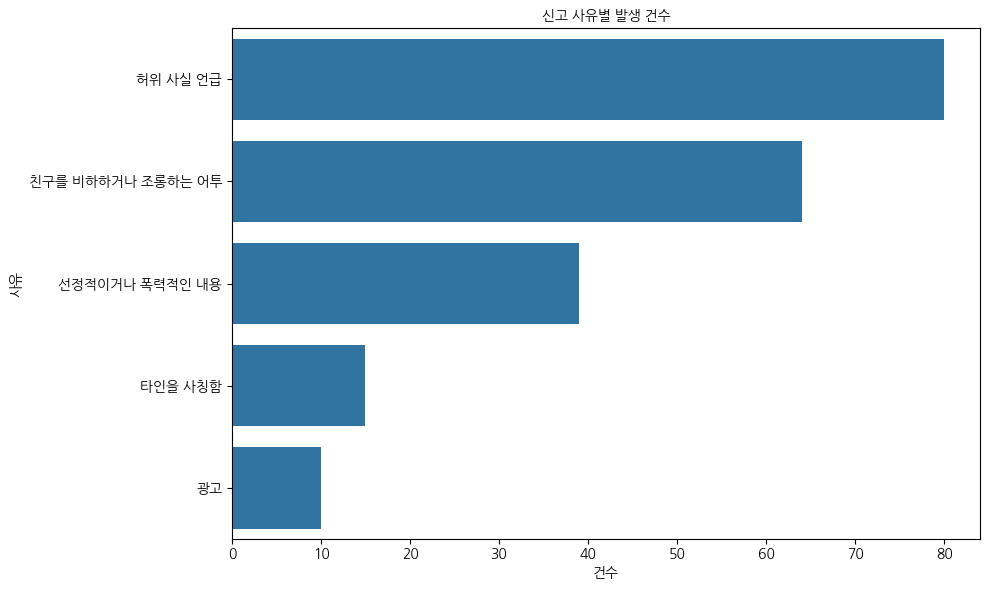

In [5]:
# 데이터 준비
df = accounts_timelinereport['reason'].value_counts().reset_index()
df.columns = ['reason', 'count']

display(df)

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=df, y='reason', x='count')

# 제목 및 라벨에 폰트 적용
plt.title('신고 사유별 발생 건수', fontproperties=fontprop)
plt.xlabel('건수', fontproperties=fontprop)
plt.ylabel('사유', fontproperties=fontprop)

# 축 눈금(label)에도 폰트 적용
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)

plt.tight_layout()
plt.show()


### 1-2.중복값 확인 

In [6]:
accounts_timelinereport['date'] = accounts_timelinereport['created_at'].dt.to_period('d')
report_duplicate = accounts_timelinereport[accounts_timelinereport.duplicated(['reason','date','user_id','reported_user_id','user_question_record_id'],keep=False)]
print(report_duplicate.shape)
report_duplicate

(55, 7)


,id,reason,created_at,reported_user_id,user_id,user_question_record_id,date
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049,2023-05-06
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049,2023-05-06
12,612,허위 사실 언급,2023-05-07 03:03:58,885473,867048,5421572,2023-05-07
13,613,허위 사실 언급,2023-05-07 03:04:01,885473,867048,5421572,2023-05-07
14,614,허위 사실 언급,2023-05-07 03:04:03,885473,867048,5421572,2023-05-07
15,615,허위 사실 언급,2023-05-07 03:04:04,885473,867048,5421572,2023-05-07
16,616,허위 사실 언급,2023-05-07 03:04:06,885473,867048,5421572,2023-05-07
17,740,허위 사실 언급,2023-05-07 06:14:57,939196,944838,5649541,2023-05-07
18,741,허위 사실 언급,2023-05-07 06:15:00,939196,944838,5649541,2023-05-07
19,742,허위 사실 언급,2023-05-07 06:15:02,939196,944838,5649541,2023-05-07


### 1-3.신고자/피신고자 수 기준 Top 10 유저

In [7]:
display(accounts_timelinereport['user_id'].value_counts().reset_index().describe().T[['count','mean','50%','max']])

display(accounts_timelinereport['reported_user_id'].value_counts().reset_index().describe().T[['count','mean','50%','max']])

,count,mean,50%,max
user_id,115.0,1.141696e+06,1169723.0,1548002.0
count,115.0,1.808696e+00,1.0,19.0


,count,mean,50%,max
reported_user_id,125.0,1134373.432,1155289.0,1562736.0
count,125.0,1.664,1.0,15.0


두개 모두 중위수가 1 -> 대부분 한번의 신고를 한다.

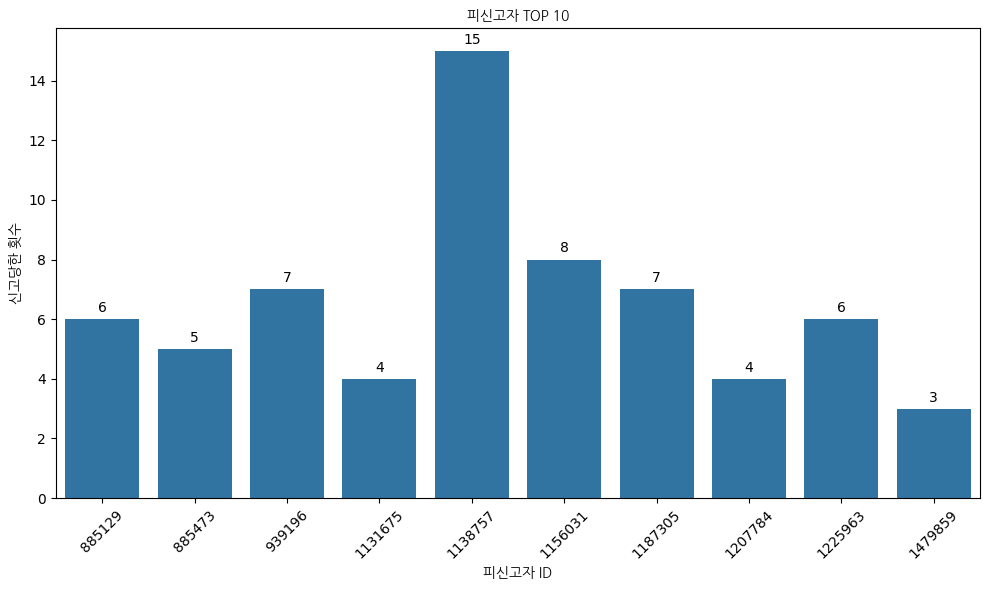

In [8]:
# 데이터 준비
reported_user = accounts_timelinereport['reported_user_id'].value_counts().head(10).reset_index()
reported_user.columns = ['reported_user_id', 'count']

# 시각화
plt.figure(figsize=(10,6))
ax = sns.barplot(data=reported_user, x='reported_user_id', y='count')

# 각 바 위에 값 표시
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3)

# 옵션 설정
plt.title('피신고자 TOP 10', fontproperties=fontprop)
plt.xlabel('피신고자 ID', fontproperties=fontprop)
plt.ylabel('신고당한 횟수', fontproperties=fontprop)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



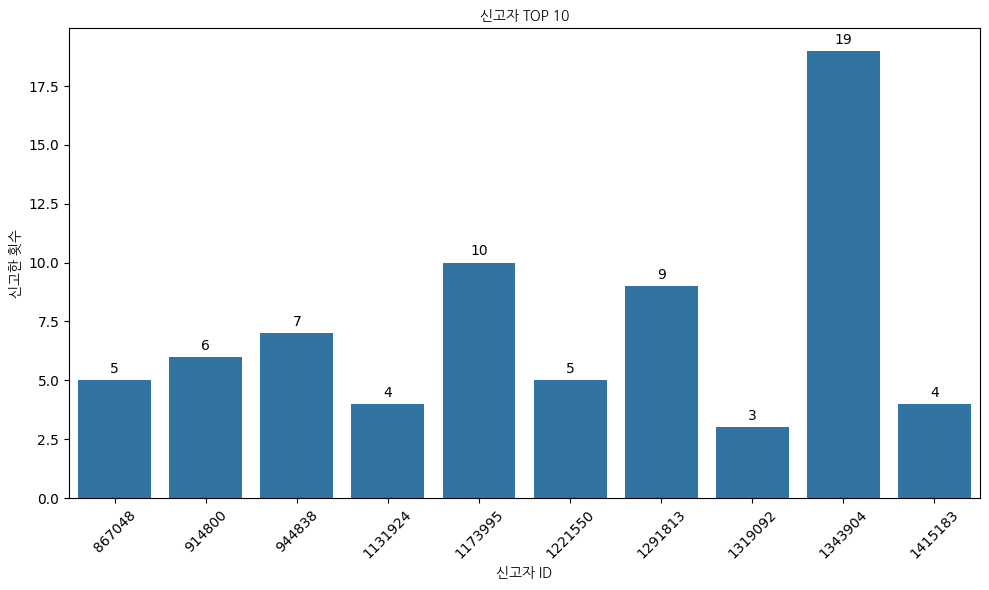

In [9]:
# 데이터 준비
report_user = accounts_timelinereport['user_id'].value_counts().head(10).reset_index()
report_user.columns = ['user_id', 'count']

# 시각화
plt.figure(figsize=(10,6))
ax = sns.barplot(data=report_user, x='user_id', y='count')

# 각 바 위에 값 표시
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3)

# 옵션 설정
plt.title('신고자 TOP 10', fontproperties=fontprop)
plt.xlabel('신고자 ID', fontproperties=fontprop)
plt.ylabel('신고한 횟수', fontproperties=fontprop)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1-4신고 테이블 시간관련 탐색

In [10]:
print(accounts_timelinereport['created_at'].min(),accounts_timelinereport['created_at'].max())
display(accounts_timelinereport['date'].describe())
same_day = accounts_timelinereport[accounts_timelinereport['date'] == '2023-05-16']
display(same_day)
display(same_day.describe(include='all'))



2023-05-06 04:44:57 2023-06-02 08:30:06


count            208
unique            25
top       2023-05-16
freq              23
Name: date, dtype: object

,id,reason,created_at,reported_user_id,user_id,user_question_record_id,date
121,11021,허위 사실 언급,2023-05-16 00:55:38,1219972,1248056,52882439,2023-05-16
122,11096,허위 사실 언급,2023-05-16 03:23:22,1272969,1295255,49865554,2023-05-16
123,11097,타인을 사칭함,2023-05-16 03:23:42,1272969,1295255,50215041,2023-05-16
124,11098,친구를 비하하거나 조롱하는 어투,2023-05-16 03:24:08,1207467,1291813,54737854,2023-05-16
125,11100,친구를 비하하거나 조롱하는 어투,2023-05-16 03:26:17,1207467,1291813,54559381,2023-05-16
126,11107,선정적이거나 폭력적인 내용,2023-05-16 03:29:12,1225963,1291813,54726345,2023-05-16
127,11108,허위 사실 언급,2023-05-16 03:29:21,1235698,1291813,54557367,2023-05-16
128,11111,친구를 비하하거나 조롱하는 어투,2023-05-16 03:32:56,1225963,1291813,54702652,2023-05-16
129,11127,친구를 비하하거나 조롱하는 어투,2023-05-16 03:51:51,1272969,1295255,54721382,2023-05-16
130,11157,친구를 비하하거나 조롱하는 어투,2023-05-16 04:36:54,1237853,1251559,54768672,2023-05-16


,id,reason,created_at,reported_user_id,user_id,user_question_record_id,date
count,23.000000,23,23,2.300000e+01,2.300000e+01,2.300000e+01,23
unique,NaN,4,NaN,NaN,NaN,NaN,1
top,NaN,친구를 비하하거나 조롱하는 어투,NaN,NaN,NaN,NaN,2023-05-16
freq,NaN,12,NaN,NaN,NaN,NaN,23
mean,11374.608696,NaN,2023-05-16 06:45:16.434782464,1.222325e+06,1.267242e+06,5.516963e+07,NaN
min,11021.000000,NaN,2023-05-16 00:55:38,1.061811e+06,1.142998e+06,4.986555e+07,NaN
25%,11107.500000,NaN,2023-05-16 03:29:16.500000,1.213720e+06,1.261726e+06,5.463102e+07,NaN
50%,11228.000000,NaN,2023-05-16 05:43:31,1.225963e+06,1.291813e+06,5.498452e+07,NaN
75%,11554.000000,NaN,2023-05-16 09:10:43,1.272430e+06,1.291813e+06,5.600058e+07,NaN
max,12221.000000,NaN,2023-05-16 15:27:39,1.306868e+06,1.331829e+06,5.973388e+07,NaN


### 1.5 신고 → ban_status와의 연관성?

In [11]:
report_ban = accounts_user[accounts_user['ban_status']!='N'].groupby(['report_count','ban_status']).size().reset_index(name='cnt')
report_ban.sort_values(by='cnt',ascending=False)


,report_count,ban_status,cnt
2,0,W,7733
0,0,NB,602
1,0,RB,175
5,1,W,88
7,2,W,15
8,3,W,7
4,1,RB,6
3,1,NB,6
10,4,W,5
6,2,RB,3


#### (1) 데이터 요약

| report_count | ban_status | cnt  | 의미                           |
|--------------|------------|------|--------------------------------|
| 0            | W          | 7733 | 신고 0회, 탈퇴 상태             |
| 0            | NB         | 602  | 신고 0회, 계정정지 |
| 0            | RB         | 175  | 신고 0회, 제한 유저             |
| 1            | W          | 88   | 신고 1회, 탈퇴                  |
| 1            | NB         | 6    | 신고 1회, 정지 없음             |
| 1            | RB         | 6    | 신고 1회, 제한 유저             |
| 2            | W          | 15   | 신고 2회, 탈퇴                  |
| 2            | RB         | 3    | 신고 2회, 제한 유저             |
| 3            | W          | 7    | 신고 3회, 탈퇴                  |
| 4            | W          | 5    | 신고 4회, 탈퇴                  |
| 4            | RB         | 3    | 신고 4회, 제한 유저             |
| 5            | W          | 3    | 신고 5회, 탈퇴                  |
| 5            | RB         | 1    | 신고 5회, 제한 유저             |
| 7            | W          | 1    | 신고 7회, 탈퇴                  |
| 8            | RB         | 2    | 신고 8회, 제한 유저             |
| 10           | W          | 2    | 신고 10회, 탈퇴                 |
| 14           | W          | 1    | 신고 14회, 탈퇴                 |

#### (2) 분석 요약

2.1 신고 없이 탈퇴한 유저가 매우 많음
- 신고를 0회 당하고도 탈퇴한 유저가 7,733명
- 자발적 탈퇴, 비신고 사유로 인한 탈퇴로 추정

2.2 신고 횟수가 많아질수록 탈퇴 비율 증가
- 신고 1회 이상부터는 대부분이 W(탈퇴) 상태
- 신고 3~14회 유저는 거의 예외 없이 탈퇴

2.3 제한 유저(RB)는 신고 횟수와 무관하게 존재
- 신고 0회여도 RB 유저가 175명 존재
- 내부 규칙 또는 시스템 판정에 따른 제한 추정

#### (3) 결론

- 신고가 많아질수록 계정이 탈퇴(W) 혹은 제한(RB) 상태로 전환되는 경향
- 신고 없이 탈퇴하거나 제한된 사례도 다수 존재 (운영 정책 개입 가능성)
- NB 상태는 거의 신고 이력이 없는 유저에게만 적용됨

### 1-6.차단과 유저신고 내역 비교

In [12]:
accounts_blockrecord['created_at'].describe().T[['min','max']]

min    2023-05-04 23:01:53
max    2024-05-06 13:03:37
Name: created_at, dtype: object

유저신고는 23년 5월-6월(2023-05-06 04:44:57 2023-06-02 08:30:06) 

이와 다르게 차단을 1년 데이터 비교를 위해서는 한달치만 봐야할것 같음

In [13]:
accounts_blockrecord['date'] = accounts_blockrecord['created_at'].dt.to_period('d')
date_block = accounts_blockrecord[(accounts_blockrecord['date'] >= '2023-05-06') & (accounts_blockrecord['date'] <= '2023-06-02') ]

display(date_block[date_block.duplicated(['date','block_user_id','user_id'],keep=False)].head())
print(date_block[date_block.duplicated(['date','block_user_id','user_id'],keep=False)].shape)

,id,reason,created_at,block_user_id,user_id,date
28,40,친구 사이가 어색해짐,2023-05-06 02:15:59,875213,885214,2023-05-06
29,41,친구 사이가 어색해짐,2023-05-06 02:21:16,875213,885214,2023-05-06
33,46,모르는 사람임,2023-05-06 03:10:38,861993,857629,2023-05-06
34,47,모르는 사람임,2023-05-06 03:10:47,861993,857629,2023-05-06
71,106,너무 많은 양의 질문을 보냄,2023-05-06 08:35:02,852860,851333,2023-05-06


(1265, 6)


1. reason,block_user_id,user_id가 모두 중복이라면 마지막값만 남겨도 괜찮을 것 같음
2. reason은 다르다면 한번에 여러개를 선택할수 있는거 아닐까?

In [14]:
accounts_timelinereport_id = accounts_timelinereport['reported_user_id'].unique()
report_block = date_block[date_block['block_user_id'].isin(accounts_timelinereport_id)]
display(report_block)
display(accounts_timelinereport[accounts_timelinereport['reported_user_id'].isin(report_block['block_user_id'].unique())])

,id,reason,created_at,block_user_id,user_id,date
2842,3821,모르는 사람임,2023-05-11 00:30:41,887882,875295,2023-05-11
3438,4634,모르는 사람임,2023-05-12 03:03:05,1127911,1147938,2023-05-12
3658,4908,나랑 관련 없는 질문을 자꾸 보냄,2023-05-12 11:01:49,916471,875493,2023-05-12
4890,6540,모르는 사람임,2023-05-14 02:55:26,1150928,1137878,2023-05-14
6091,8119,모르는 사람임,2023-05-16 00:23:51,973584,1289694,2023-05-16
9705,12686,친구 사이가 어색해짐,2023-05-22 10:40:32,1448785,1421233,2023-05-22
9774,12782,사칭 계정,2023-05-22 12:39:16,1408207,1237907,2023-05-22


,id,reason,created_at,reported_user_id,user_id,user_question_record_id,date
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914,2023-05-06
38,4970,친구를 비하하거나 조롱하는 어투,2023-05-10 21:49:02,916471,976686,15537518,2023-05-10
54,6340,허위 사실 언급,2023-05-12 02:48:56,1150928,1137878,26226336,2023-05-12
106,10148,허위 사실 언급,2023-05-15 03:28:06,1127911,1156031,48341818,2023-05-15
112,10308,광고,2023-05-15 07:17:06,973584,1228033,48382534,2023-05-15
182,16743,친구를 비하하거나 조롱하는 어투,2023-05-22 12:15:24,1408207,1415183,92204977,2023-05-22
184,17021,선정적이거나 폭력적인 내용,2023-05-22 22:06:00,1408207,1415183,95268534,2023-05-22
186,17023,친구를 비하하거나 조롱하는 어투,2023-05-22 22:06:09,1408207,1415183,92204977,2023-05-22
202,21761,허위 사실 언급,2023-05-29 14:09:03,1448785,1460473,130511263,2023-05-29


한건만 허위사실언급으로 신고한후 이틀 후 차단 
- 4890	6540	모르는 사람임	2023-05-14 02:55:26	1150928	1137878	2023-05-14
- 54	6340	허위 사실 언급	2023-05-12 02:48:56	1150928	1137878	26226336	2023-05-12

## 2.유저 상태 및 활동 성향 분석

In [15]:
print(accounts_user['created_at'].min() , accounts_user['created_at'].max())

2023-03-29 03:44:14.047130 2024-05-09 08:31:17.710824


### 2-1.가장 가입이 많은 날 top15

,date,cnt
0,2023-05-07,48539
1,2023-05-13,46258
2,2023-05-09,40495
3,2023-05-10,39822
4,2023-05-06,39053
5,2023-05-08,38850
6,2023-05-11,36586
7,2023-05-12,33217
8,2023-05-16,33149
9,2023-05-14,30596


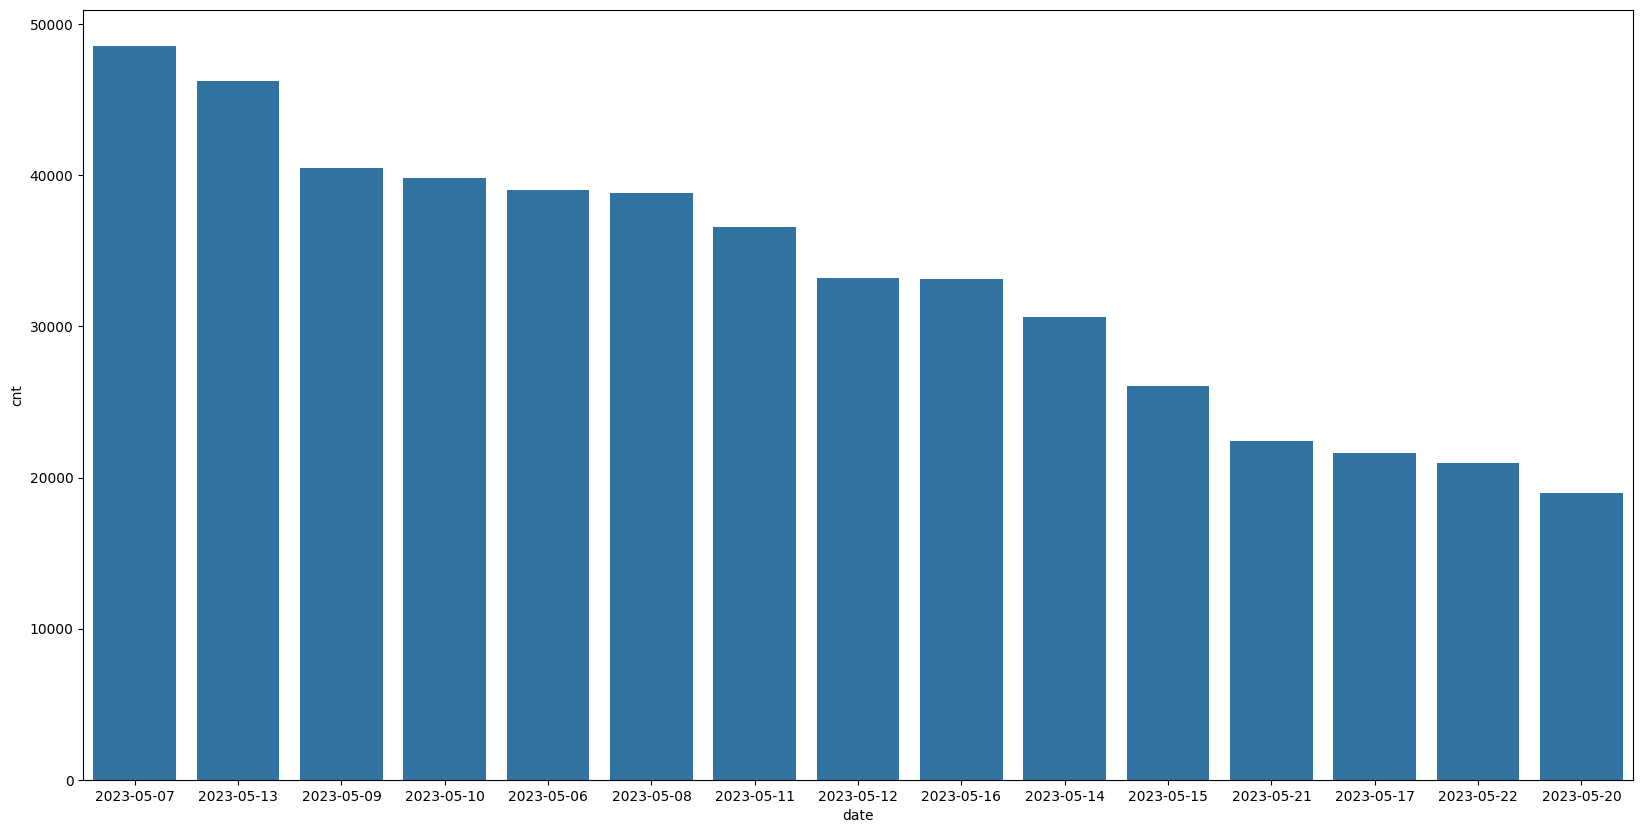

In [16]:
accounts_user['date'] = accounts_user['created_at'].dt.to_period('d')

user_enroll_date = accounts_user['date'].value_counts().reset_index(name='cnt').head(15)
display(user_enroll_date)
plt.figure(figsize=(20,10))
sns.barplot(user_enroll_date,x='date',y='cnt')
plt.show()

### 2-2.월별 가입자수 추이 

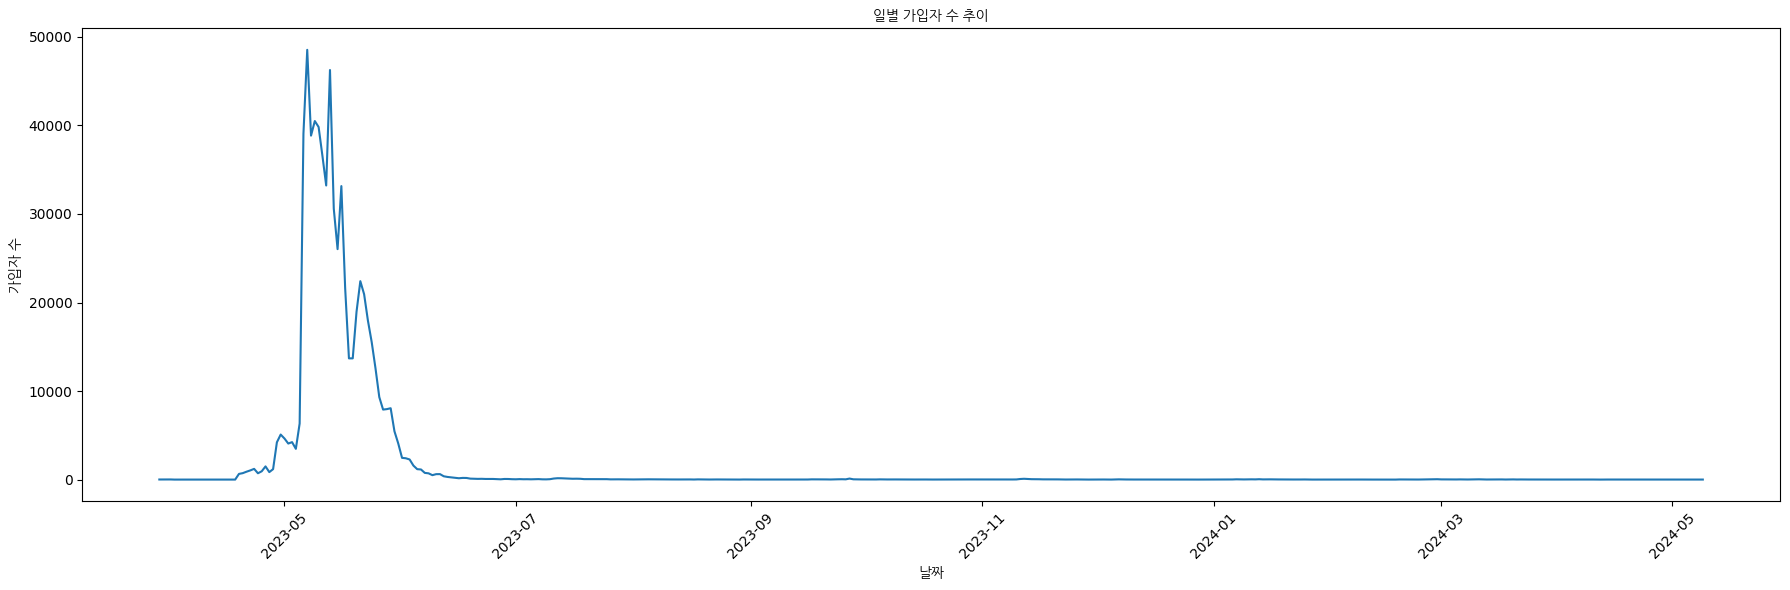

In [17]:
time_cnt = accounts_user['date'].value_counts().reset_index(name='cnt')
time_cnt.sort_values(by='date')
time_cnt

# Period → Timestamp
time_cnt['date'] = time_cnt['date'].dt.to_timestamp()

# 정렬
time_cnt = time_cnt.sort_values(by='date')

# 시각화
plt.figure(figsize=(18, 6))
sns.lineplot(data=time_cnt, x='date', y='cnt')
plt.xticks(rotation=45)
plt.xlabel('날짜', fontproperties=fontprop)
plt.ylabel('가입자 수', fontproperties=fontprop)
plt.title('일별 가입자 수 추이', fontproperties=fontprop)
plt.tight_layout()
plt.show()

<sub>

#### 2023~2024 일별 가입자 수 추이 해석



1. 2023년 5월 초 - 가입자 수 폭발
- 2023-05-06 ~ 2023-05-14 사이, 가입자 수 급증
  - 5/06: 39,053명  
  - 5/07: 48,539명  
  - 5/13: 46,258명
- 서비스 출시, 캠페인, 광고 런칭 등의 외부 요인 추정
- 단기 바이럴 또는 집중 유입 전략의 효과 가능성



2. 2023년 5월 하순~6월 초 - 급격한 감소
- 약 2주 내 가입자 수가 5만 → 수천 명으로 감소
  - 5/25: 12,570명  
  - 6/01: 2,456명
- 이벤트 종료, 광고 중단, 사용자의 초기 관심 이탈 가능성



3. 2023년 6월 중순 이후 - 장기 정체
- 2023-06 ~ 2024-05까지 가입자 수 장기 하락세
  - 대부분 일일 100명 미만, 한 자릿수인 날도 다수
- 유입 전략 부재, 자연 유입만으로 운영되는 상태



#### 요약 인사이트

| 시기                | 특징                   | 추정 원인                          |
|---------------------|------------------------|------------------------------------|
| 2023-05-06 ~ 05-14  | 최고치 (일 5만명 수준) | 광고, 이벤트, 서비스 오픈         |
| 2023-05-15 ~ 06-05  | 가입자 급감            | 단기 이슈 종료, 관심 이탈         |
| 2023-06 이후 ~ 현재 | 극소 유입 유지         | 유입 전략 중단, 자연 유입만 유지  |



#### 후속 분석 제안
- 2023년 5월 초 유입 원인(이벤트/홍보 등) 확인
- 6월 이후 이탈률 및 잔존율 분석
- 월별 리샘플링 및 이동평균선을 통한 장기 추세 분석
- 장기 정체 구간에 대한 재활성화 전략 도출

</sub>



### 2-3.투표기록테이블 - 상태(초성 열람)확인

In [6]:
# 상태별 개수 비율 계산 (정규화된 비율)
status_probs = accounts_userquestionrecord['status'].value_counts(normalize=True)

print(round(status_probs*100,2))

status
C    94.97
I     4.98
B     0.05
Name: proportion, dtype: float64


전체 투표에서 4%만이 초성열람 -> 수익성 괜찮은가?

### 2-4.친구요청 관련 데이터 탐색

In [7]:
accounts_friendrequest.head()

# 상태별 개수 비율 계산 (정규화된 비율)
status_probs = accounts_friendrequest['status'].value_counts(normalize=True)

print(round(status_probs*100,2))

status
A    75.11
P    22.97
R     1.93
Name: proportion, dtype: float64


In [8]:
# 1. datetime 변환
accounts_friendrequest['created_at'] = pd.to_datetime(accounts_friendrequest['created_at'], errors='coerce')
accounts_friendrequest['updated_at'] = pd.to_datetime(accounts_friendrequest['updated_at'], errors='coerce')

# 2. 결측 제거
accounts_friendrequest = accounts_friendrequest.dropna(subset=['created_at', 'updated_at'])

# 3. duration 계산
accounts_friendrequest['duration'] = accounts_friendrequest['updated_at'] - accounts_friendrequest['created_at']
accounts_friendrequest['duration_sec'] = accounts_friendrequest['duration'].dt.total_seconds()

# 4. 메모리 줄이기 (선택)
accounts_friendrequest['status'] = accounts_friendrequest['status'].astype('category')
accounts_friendrequest['receive_user_id'] = accounts_friendrequest['receive_user_id'].astype('int32')
accounts_friendrequest['send_user_id'] = accounts_friendrequest['send_user_id'].astype('int32')


In [9]:
accounts_friendrequest['duration'].describe().T[['min','50%','max']]

min      0 days 00:00:00
50%      0 days 01:56:52
max    362 days 12:36:08
Name: duration, dtype: object

중위수가 약 2시간이다.
대부분의 유저들은 2시간안에 수락하거나 거절한다.

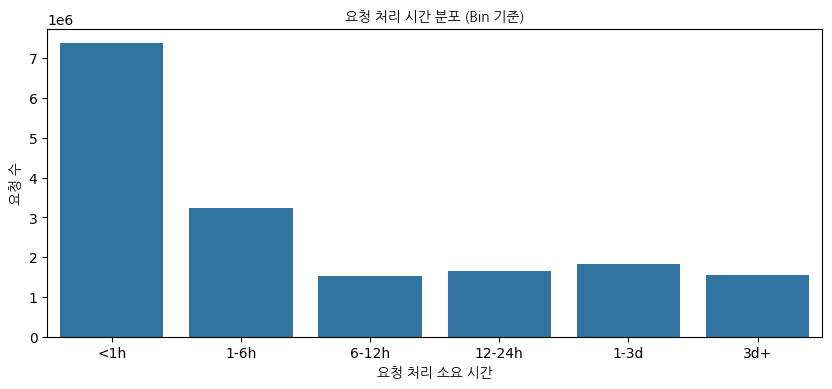

In [10]:
accounts_friendrequest['duration_hour'] = accounts_friendrequest['duration_sec'] / 3600
bins = [0, 1, 6, 12, 24, 72, accounts_friendrequest['duration_hour'].max()]
labels = ['<1h', '1-6h', '6-12h', '12-24h', '1-3d', '3d+']

accounts_friendrequest['duration_bin'] = pd.cut(accounts_friendrequest['duration_hour'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 4))
sns.countplot(data=accounts_friendrequest, x='duration_bin', order=labels)
plt.xlabel('요청 처리 소요 시간',fontproperties=fontprop)
plt.ylabel('요청 수',fontproperties=fontprop)
plt.title('요청 처리 시간 분포 (Bin 기준)',fontproperties=fontprop)
plt.show()

In [11]:
accounts_friendrequest['duration_bin'].value_counts()

duration_bin
<1h       7375923
1-6h      3230937
1-3d      1817900
12-24h    1643901
3d+       1554258
6-12h     1524256
Name: count, dtype: int64

### 2-5.성비 확인

In [12]:
accounts_user['gender'].value_counts()

gender
F    396665
M    280418
Name: count, dtype: int64

### 2-6. 투표 기록 테이블

In [6]:
accounts_userquestionrecord['has_read'].value_counts()

has_read
1    675931
0    541627
Name: count, dtype: int64

In [7]:
accounts_userquestionrecord.head()

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0


In [16]:
polls_usercandidate.head(20)

,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 12:27:49,998458,849444
1,3088873,2023-04-28 12:27:49,998458,849454
2,3088874,2023-04-28 12:27:49,998458,849460
3,3088875,2023-04-28 12:27:49,998458,849469
4,3088964,2023-04-28 12:28:02,998459,849446
5,3088965,2023-04-28 12:28:02,998459,849466
6,3088966,2023-04-28 12:28:02,998459,849497
7,3088967,2023-04-28 12:28:02,998459,849498
8,3089012,2023-04-28 12:28:09,998460,838642
9,3089013,2023-04-28 12:28:09,998460,849445


In [10]:
usercandidate_user = polls_usercandidate.groupby(['question_piece_id','created_at'])['user_id'].size().reset_index()

In [11]:
usercandidate_user['user_id'].value_counts()

user_id
4     1119066
3       95288
2        3164
1         227
8          94
6           9
12          6
16          3
Name: count, dtype: int64

In [4]:
polls_question.head()

,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55


In [21]:
print(polls_question['id'].max())
print(polls_questionpiece['question_id'].max())

5133
5133


In [23]:
print(polls_question['id'].nunique())
print(polls_questionpiece['question_id'].nunique())

5025
4944
